# Create weekly summary

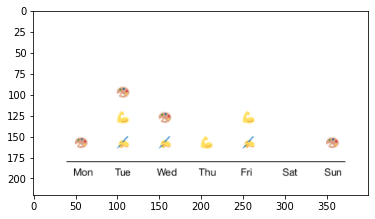

In [10]:
import io
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw, ImageFont
from pilmoji import Pilmoji


# Define days
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] # Change into ['M','T',,,'S'] how you like it

# Map available habits
habit_mapping = {
    "habit1": "✍️",
    "habit2": "💪",
    "habit3": "🎨"
}


# User habits, change to real user data
user_habits = {
    "habit1": [0,1,1,0,1,0,0], 
    "habit2":[0,1,0,1,1,0,0,1], 
    "habit3": [1,1,1,0,0,0,1]
}

# Define fonts for text and emojis
font = ImageFont.truetype("HelveticaNeue-Regular.otf", 12) # Choose your own font
emoji_font = ImageFont.truetype("HelveticaNeue-Regular.otf", 15) # Choose the size of the emoji

# Create 400x200 image base
im = Image.new('RGBA', (400, 220), color="white")
draw = ImageDraw.Draw(im)

day_x = 48 # Start point x-axis for weekday name
user_rating_x = 52 # Start point x-axis for habit emoji

# Draw horizontal line
draw.line([(40, 180), (400 - 28, 180)], fill=(0, 0, 0), width=0)

# Loop over day list [mon, tues, ..., 'sun']
for i, day in enumerate(days):
    
    # Print the weekday name
    draw.text((day_x, 185), day, fill="black", font=font)
    
    habit_y = 150 # Starting point for habit on y-axis
    
    # Loop over each habit for each day
    for habit in user_habits:
        
        # Map the habit with available habits 
        habit_rating = user_habits[habit][i]
        
        # Only print the performed habits != 0
        if habit_rating != 0:
            
            # Package to print emojis in PIL
            with Pilmoji(im) as pilmoji:
                
                # Print the emoji with slight offset in x-axis (+2)
                pilmoji.text((day_x+2, habit_y), habit_mapping[habit], (0, 0, 0), emoji_font)
                
            # Move the y-axis position -30 pixels up
            habit_y -= 30
    # Move the x-axis position for weekday names 50 pixels to the right
    day_x += 50
    
# Save image locally


# Alternative ways to save image

# 1. Simple, save image locally
im.save('weekly_summary.png')

# 2. Save the image to an in-memory file
in_mem_file = io.BytesIO()
im.save(in_mem_file, format='PNG')
byte_img_string = in_mem_file.seek(0) # Save this byte string to your bucket etc

# Show image
imshow(im)